# EDA on Predict Student Performance from Game Play
Data source on [Kaggle](https://www.kaggle.com/competitions/predict-student-performance-from-game-play/data?select=test.csv)

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from pywaffle import Waffle

sns.set_theme(style = "whitegrid", palette = "pastel")

# Import Datasets
There are 4 datasets from Kaggle
- `train.csv`: training dataset
- `train_labels.csv`: training labels
- `test.csv`: test dataset
- `sample_submission.csv`: sample of submission for prediction

In [2]:
df_train = pd.read_csv("data/train.csv")
df_train_labels = pd.read_csv("data/train_labels.csv")
df_test = pd.read_csv("data/test.csv")
df_submission = pd.read_csv("data/sample_submission.csv")

# Explore the Datasets
## Summary tables

In [3]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values * 100
    summ['%missing'] = df.isnull().sum().values / len(df)
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    
    return summ

In [4]:
summary_table = summary(df_train)
summary_table

data shape: (13174211, 20)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
session_id,int64,0,0.000000,11779,20090312431273200.0,22100221145014656.0,20090312431273200,20090312431273200,20090312431273200
index,int64,0,0.000000,20348,0.0,20473.0,0,1,2
elapsed_time,int64,0,0.000000,3804019,0.0,1749293395.0,0,1323,831
event_name,object,0,0.000000,11,NaN,NaN,cutscene_click,person_click,person_click
name,object,0,0.000000,6,NaN,NaN,basic,basic,basic
level,int64,0,0.000000,23,0.0,22.0,0,0,0
page,float64,1288946500,0.978386,7,0.0,6.0,NaN,NaN,NaN
room_coor_x,float64,103624000,0.078657,9120274,-1992.354569,1261.773745,-413.991405,-413.991405,-413.991405
room_coor_y,float64,103624000,0.078657,7047316,-918.158687,543.616424,-159.314686,-159.314686,-159.314686
screen_coor_x,float64,103624000,0.078657,35331,0.0,1916.0,380.0,380.0,380.0


In [5]:
summary_table = summary(df_test)
summary_table

data shape: (3728, 21)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
session_id,int64,0,0.000000,3,20090109393214576.0,20090312331414616.0,20090109393214576,20090109393214576,20090109393214576
index,int64,0,0.000000,1564,0.0,1563.0,0,1,2
elapsed_time,int64,0,0.000000,3720,0.0,6524025.0,0,1965,3614
event_name,object,0,0.000000,11,NaN,NaN,cutscene_click,person_click,person_click
name,object,0,0.000000,6,NaN,NaN,basic,basic,basic
level,int64,0,0.000000,23,0.0,22.0,0,0,0
page,float64,357500,0.958959,7,0.0,6.0,NaN,NaN,NaN
room_coor_x,float64,36200,0.097103,3146,-1913.116237,1214.941972,-413.991405,-105.991405,-418.991405
room_coor_y,float64,36200,0.097103,2668,-908.32527,489.514956,75.685314,-63.314686,47.685314
screen_coor_x,float64,36200,0.097103,801,0.0,879.0,380.0,688.0,375.0


### Findings
- The train.csv file is over 2GB in size and contains more than 13 million rows with 20 features.
- The test dataframe has an additional column named `session_level` that will be utilized to generate the submission file.

## Missing values

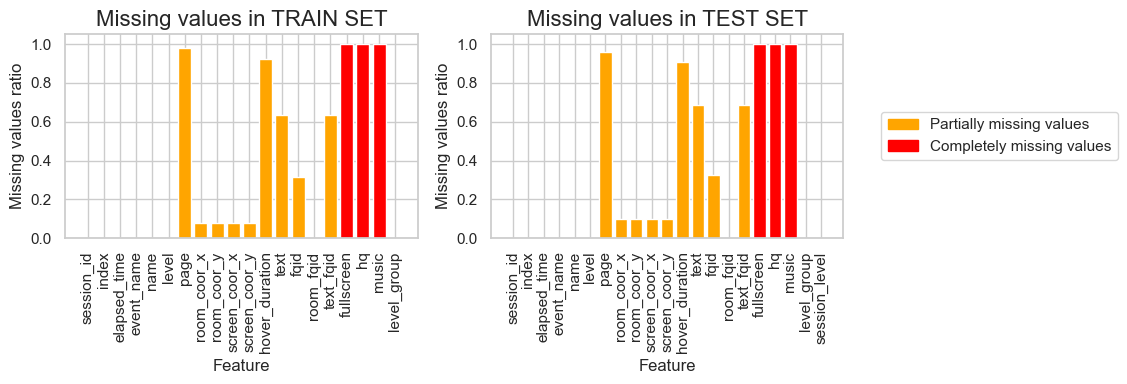

In [6]:
train_missing_ratios = df_train.isna().sum() / len(df_train)
test_missing_ratios = df_test.isna().sum() / len(df_test)

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.bar(train_missing_ratios.index,
        train_missing_ratios.values,
        color=['red' if ratio == 1 else 'orange' for ratio in train_missing_ratios.values])
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Missing values ratio', fontsize=12)
plt.title('Missing values in TRAIN SET', fontsize=16)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(test_missing_ratios.index,
        test_missing_ratios.values,
        color=['red' if ratio == 1 else 'orange' for ratio in test_missing_ratios.values])
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Missing values ratio', fontsize=12)
plt.title('Missing values in TEST SET', fontsize=16)
plt.xticks(rotation=90)
plt.legend(
    bbox_to_anchor = (1.8, 0.5),
    handles=[mpatches.Patch(color = 'orange'),
             mpatches.Patch(color = 'red')], 
    labels=['Partially missing values', 'Completely missing values'],
    loc = "center right"
)

plt.tight_layout()
plt.savefig("EDA_plot/missing_value.pdf", format = "pdf", bbox_inches = "tight")
plt.show()

### Findings
- Some columns have high ratio of missing values
- We should drop `fullscreen`, `hq` and `music` features as they completely contain no information
- We may also drop features with ratio higher than certain threshold (e.g. 80%). To make this decision about keeping or not the columns with high missing ratio, we will have to evaluate the relevance of them.
- The train and test dataframes have similar ratios of missing values.

## Analysis on features
### `session_id` and `index`
> `session_id` - the ID of the session the event took place in

> `index` - the index of the event for the session

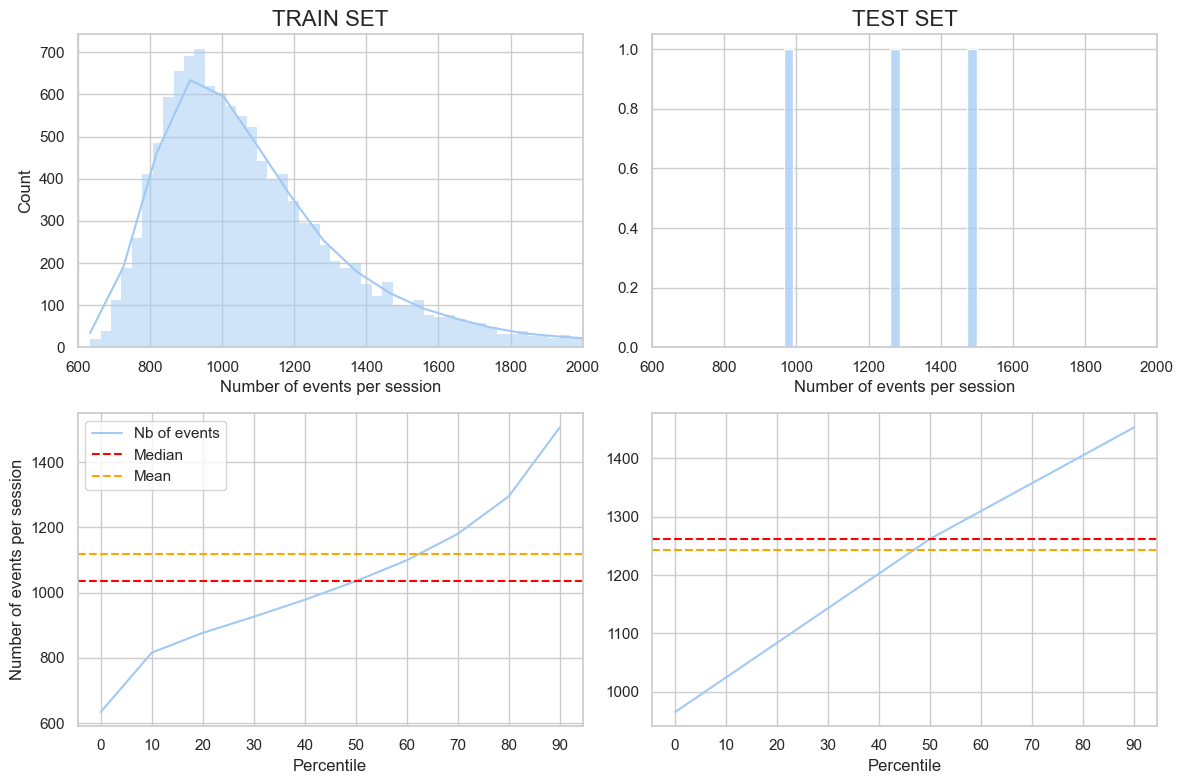

,TRAIN,TEST
Index,,
No. of sessions,11779,3
Min. no. of events,634,965
Max. no. of events,19032,1501


In [7]:
# number of events
train_events_per_session = df_train['session_id'].value_counts()
test_events_per_session = df_test['session_id'].value_counts()

# calcuate percentiles
qrange = np.arange(0, 100, 10)
train_percentiles = [np.percentile(train_events_per_session, q) for q in qrange]
test_percentiles = [np.percentile(test_events_per_session, q) for q in qrange]

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(train_events_per_session.values, kde=True)
plt.xlabel("Number of events per session", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("TRAIN SET", fontsize=16)
plt.xlim(600, 2000)

plt.subplot(2, 2, 2)
sns.histplot(test_events_per_session.values, bins=20)
plt.xlabel("Number of events per session", fontsize=12), plt.ylabel("")
plt.title("TEST SET", fontsize=16)
plt.xlim(600, 2000)

plt.subplot(2, 2, 3)
plt.plot(qrange, train_percentiles)
plt.axhline(train_events_per_session.median(), color='red', ls='--')
plt.axhline(train_events_per_session.mean(), color='orange', ls='--')
plt.xlabel("Percentile", fontsize=12)
plt.ylabel("Number of events per session", fontsize=12)
plt.xticks(qrange)
plt.legend(['Nb of events', 'Median', 'Mean'])

plt.subplot(2, 2, 4)
plt.plot(qrange, test_percentiles)
plt.axhline(test_events_per_session.median(), color='red', ls='--')
plt.axhline(test_events_per_session.mean(), color='orange', ls='--')
plt.xlabel("Percentile", fontsize=12)
plt.xticks(qrange)

plt.tight_layout()
plt.savefig("EDA_plot/no_events.pdf", format = "pdf", bbox_inches = "tight")
plt.show()

data = {"Index": ["No. of sessions", "Min. no. of events", "Max. no. of events"],
        "TRAIN": [str(df_train['session_id'].nunique()),
                  str(train_events_per_session.min()),
                  str(train_events_per_session.max())],
        "TEST": [str(df_test['session_id'].nunique()),
                 str(test_events_per_session.min()),
                 str(test_events_per_session.max())]}
df = pd.DataFrame(data).set_index('Index')
df

#### Findings

*Train dataset*
- A session could have different number of events in the range [634, 19032].
- Both mean and median are at around 1100.
- The distribution appears to be normal with little postive skew.
- The 90th percentile is around 1500, however, some session contains over 10000 events, we may consider it as outliers.

*Test dataset*
- Only 3 sessions
- Number of events are about to match with the distribution in train dataset.

Currently, we have analyzed the number of events occurring in each session. The analysis could further drill into questions levels, i.e. number of events in each question.

### `elapsed_time` and `index`
> `elapsed_time` - how much time has passed (in milliseconds) between the start of the session and when the event was recorded

The elapsed time should be positively correlated with the event index. As more time is spent, it is expected that a higher number of events will occur.

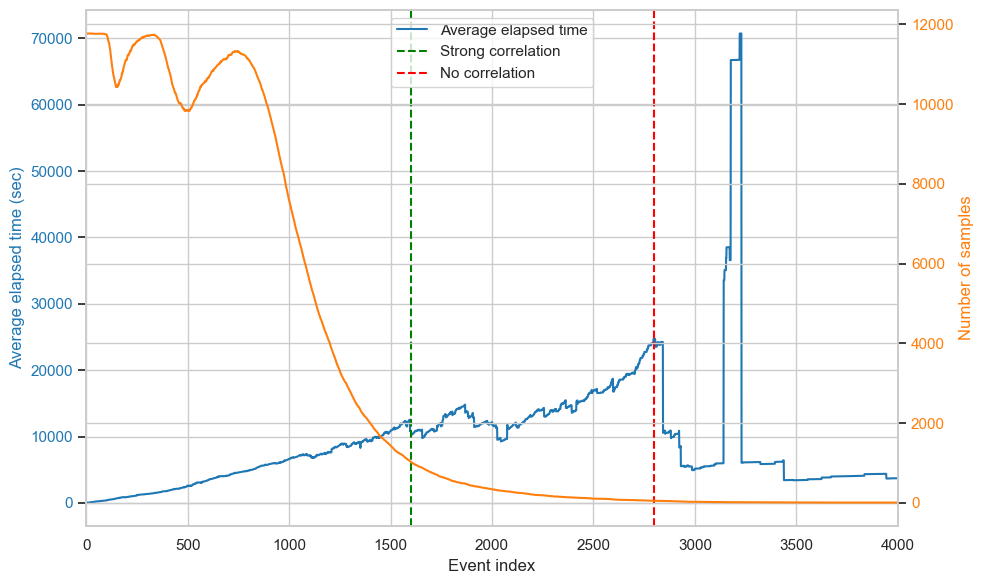

In [8]:
# Count the number of occurrences for each index
count = df_train.groupby("index")["index"].count()

# Average the elapsed time in seconds for each index
avg_elapsed_time = df_train.groupby('index')['elapsed_time'].mean() / 1000

fig, ax1 = plt.subplots(figsize = (10, 6))

color = "tab:blue"
ax1.set_xlabel("Event index")
ax1.set_ylabel("Average elapsed time (sec)", color = color)
ax1.plot(avg_elapsed_time, color = color)
ax1.set_xlim([0, 4000])
ax1.tick_params(axis = "y", labelcolor = color)
ax1.axvline(1600, color = "green", ls = "--")
ax1.axvline(2800, color = "red", ls = "--")
ax1.legend(["Average elapsed time", "Strong correlation", "No correlation"], loc = "upper center")

ax2 = ax1.twinx()
color = "tab:orange"
ax2.set_ylabel("Number of samples", color = color)
ax2.plot(count, color = color)
ax2.tick_params(axis = "y", labelcolor = color)
# ax2.legend(["Number of occurrences"])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("EDA_plot/elapsed_time.pdf", format = "pdf", bbox_inches = "tight")
plt.show()

#### Findings
- As expected, the elapsed time increases as the event index increases, which have strong correlation until the event index 1600 and no more correlations after 2800.
- This phenomenon can be explained by number of samples for larger event indexes are dropping significantly, those are likely to be outliers.

Lets look at the first 16 sessions of their elapsed time

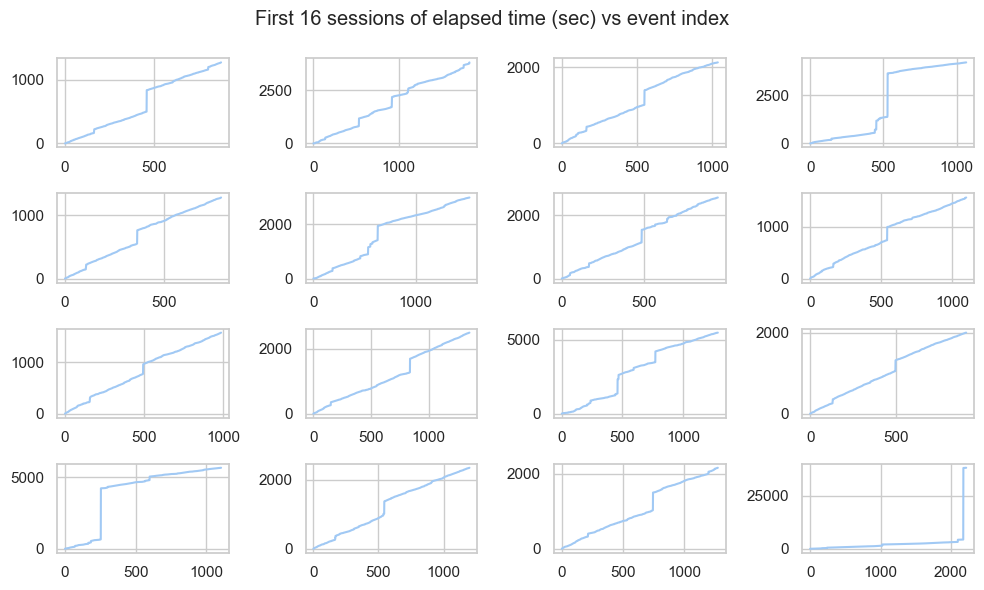

In [9]:
# Get the sessions in the dataframe
session_ids = np.array(df_train['session_id'].unique())

plt.figure(figsize=(10, 6))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    times = df_train[df_train['session_id'] == session_ids[i]]['elapsed_time']
    plt.plot(times.reset_index(drop=True) / 1000)
plt.suptitle("First 16 sessions of elapsed time (sec) vs event index")
plt.tight_layout()
plt.savefig("EDA_plot/elapsed_time_first16.pdf", format = "pdf", bbox_inches = "tight")
plt.show()   

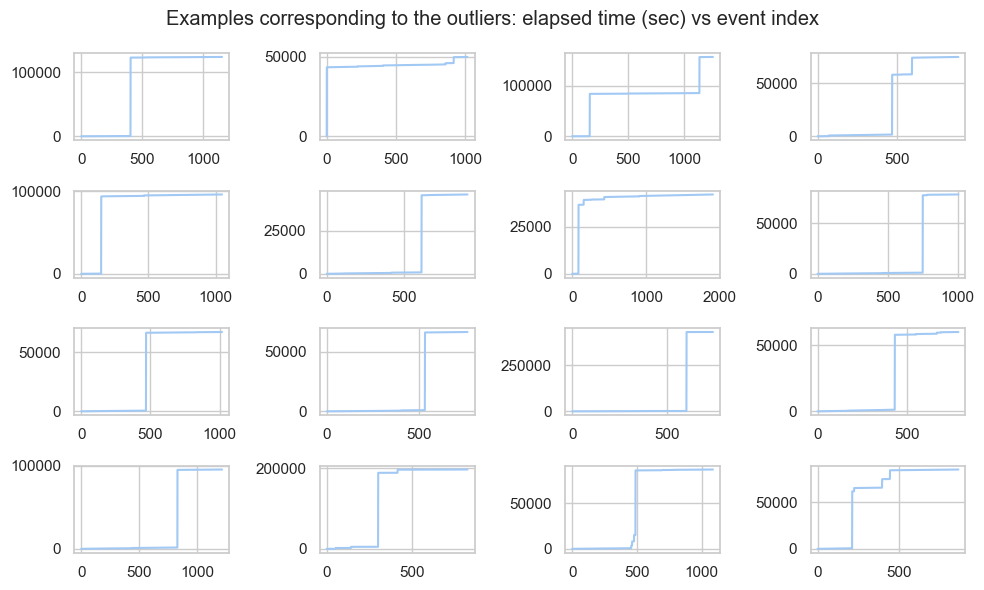

In [10]:
# Get the session ids corresponding to the outliers
outliers_session_ids = df_train[df_train['elapsed_time'] > 4e7]['session_id'].unique()

plt.figure(figsize=(10, 6))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    times = df_train[df_train['session_id'] == outliers_session_ids[i]]['elapsed_time']
    plt.plot(times.reset_index(drop=True) / 1000)
plt.suptitle("Examples corresponding to the outliers: elapsed time (sec) vs event index")
plt.tight_layout()
plt.savefig("EDA_plot/elapsed_time_outliers.pdf", format = "pdf", bbox_inches = "tight")
plt.show()

In [11]:
print(f"Longest session: {df_train['elapsed_time'].max() / 1000} seconds")

Longest session: 1749293.395 seconds


#### Findings
- The longest session lasted about 20 days, which apparently to be an extreme case.
- Most of the sessions have gaps between the increase of elapsed time, indicating pauses or inactivity.
- In the case of outlier sessions, the gap is huge due to extended periods of inactivity.

### `event_name` and `name`
> `event_name` - the name of the event type

> `name` - the event name (e.g. identifies whether a notebook_click is is opening or closing the notebook)

Number of unique event names: 11
Number of unique names: 6


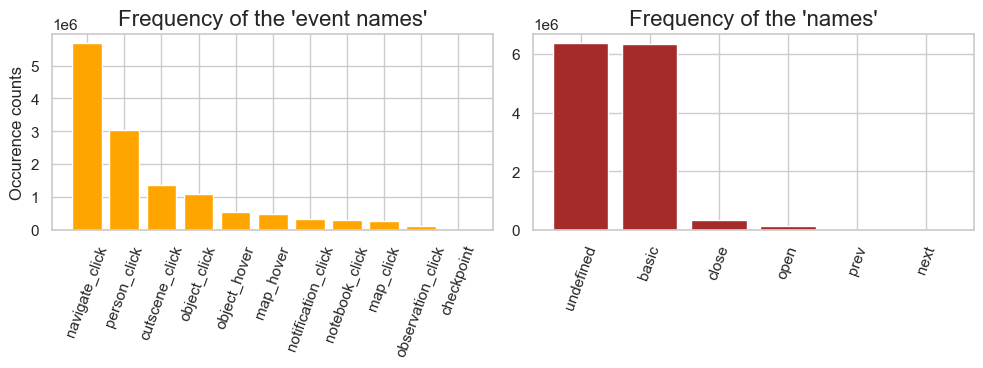

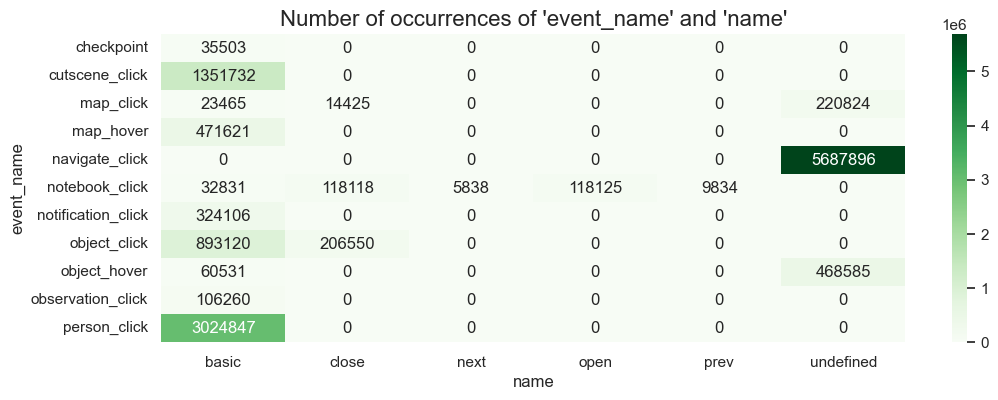

In [12]:
event_names = df_train['event_name'].value_counts()
names = df_train['name'].value_counts()

print("Number of unique event names:", len(event_names))
print("Number of unique names:", len(names))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(event_names.index, event_names.values, color='orange')
plt.ylabel("Occurence counts", fontsize=12)
plt.title("Frequency of the 'event names'", fontsize=16)
plt.xticks(rotation=70)

plt.subplot(1, 2, 2)
plt.bar(names.index, names.values, color='brown')
plt.title("Frequency of the 'names'", fontsize=16)
plt.xticks(rotation=70)

plt.tight_layout()
plt.savefig("EDA_plot/event_name.pdf", format = "pdf", bbox_inches = "tight")
plt.show()

# Pivot table
pivot_table = df_train.pivot_table(index='event_name', columns='name', aggfunc='size')
pivot_table = pivot_table.fillna(0).astype(int)
plt.figure(figsize=(12, 4))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Greens')
plt.title("Number of occurrences of 'event_name' and 'name'", fontsize=16)
plt.savefig("EDA_plot/event_name_pivot.pdf", format = "pdf", bbox_inches = "tight")
plt.show()

#### Findings
- There are 3 types of events, namely *checkpoint*, *click* and *hover*.
- Some `name` only occur in certain `event_name`, e.g. *next*, *open* and *prev* only occur in *notebook_click*.

### `index` and `level`
> `level`  - what level of the game the event occurred in (0 to 22)

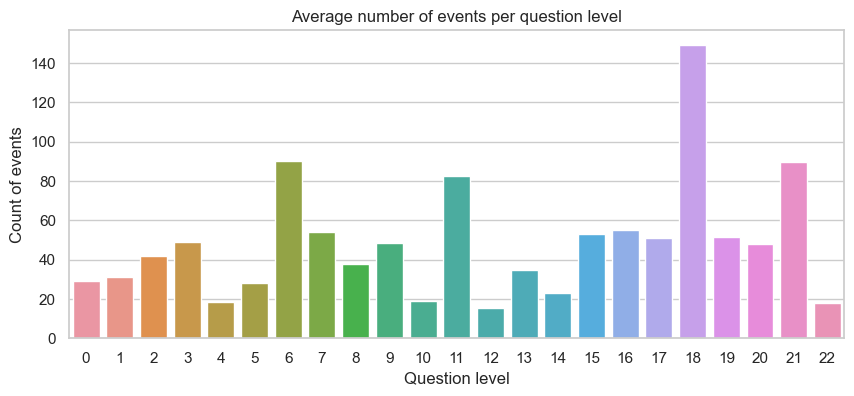

In [13]:
# Average number of events per question
grouped_df = df_train.groupby(['session_id', 'level'])\
    ['index'].count().reset_index()
grouped_df.columns = ['session_id', 'level', 'index_count']
mean_counts = grouped_df.groupby('level').mean().drop('session_id', axis=1)
mean_counts

plt.figure(figsize = (10, 4))
sns.barplot(x = mean_counts.index, y = mean_counts["index_count"])
plt.title("Average number of events per question level")
plt.xlabel("Question level")
plt.ylabel("Count of events")

plt.savefig("EDA_plot/event_per_question.pdf", format = "pdf", bbox_inches = "tight")
plt.show()

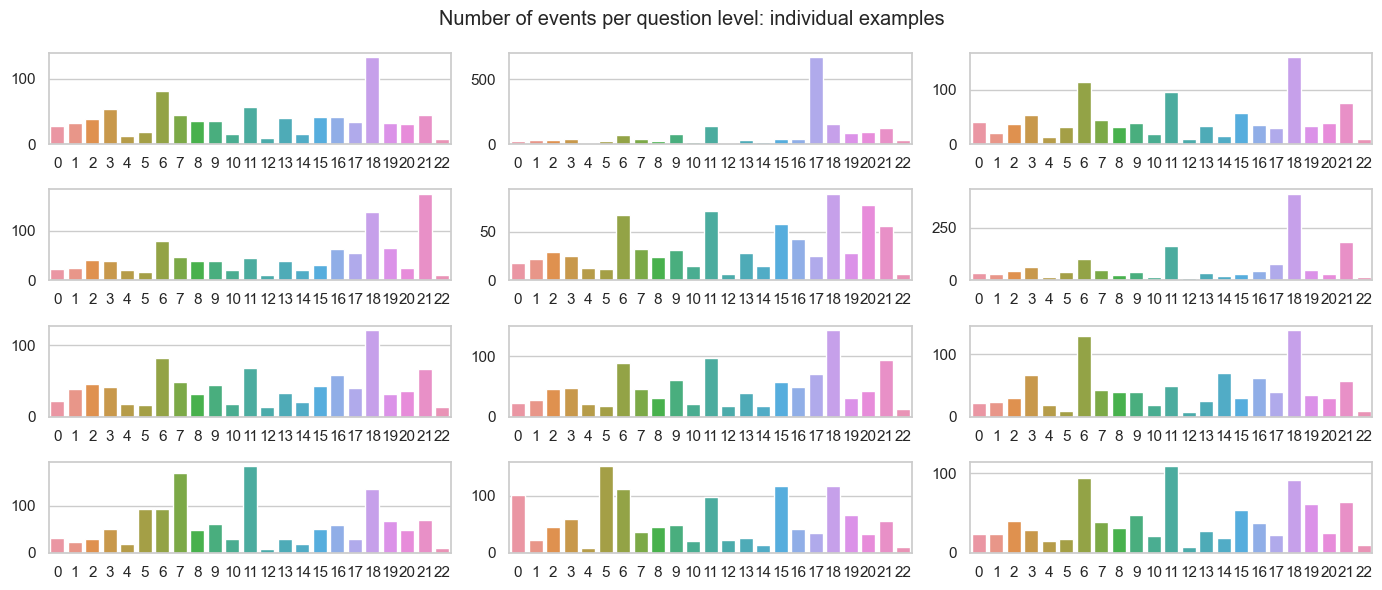

In [14]:
# Plot 12 individual examples
plt.figure(figsize = (14, 6))
for i in range(12):
    plt.subplot(4, 3, i+1)
    example = grouped_df \
        [grouped_df["session_id"] == session_ids[i]] \
        ["index_count"].reset_index(drop = True)
    
    sns.barplot(x = example.index, y = example)
    plt.ylabel(None)

plt.suptitle("Number of events per question level: individual examples")
plt.tight_layout()
plt.savefig("EDA_plot/event_per_question_individual.pdf", format = "pdf", bbox_inches = "tight")
plt.show()

#### Findings
- Specific question level have higher number of events, e.g. level 18 observe extended number of events.
- The pattern is also observed in the individual examples.

### `page`
> `page` - the page number of the event (only for notebook-related events)

Number of examples: 284746


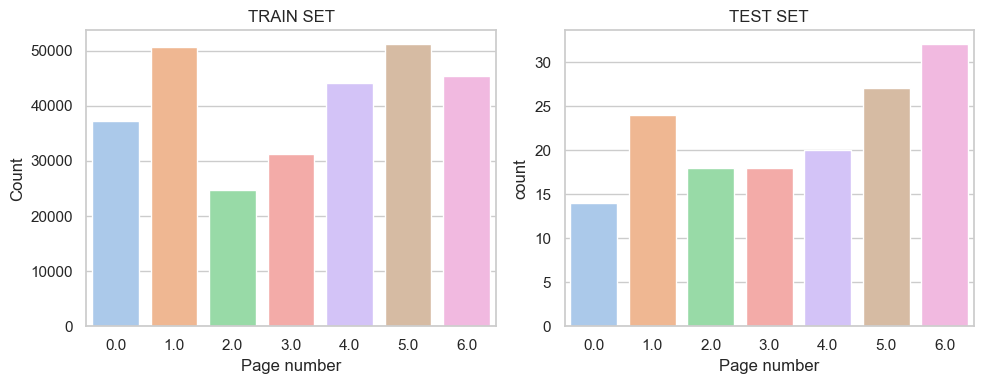

In [15]:
print(f"Number of examples: {df_train['page'].count()}")

train_page_number_counts = df_train['page'].value_counts().sort_index()
test_page_number_counts = df_test['page'].value_counts().sort_index()

plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
sns.barplot(x = train_page_number_counts.index, y = train_page_number_counts)
plt.xlabel("Page number")
plt.ylabel("Count")
plt.title("TRAIN SET")

plt.subplot(1, 2, 2)
sns.barplot(x = test_page_number_counts.index, y = test_page_number_counts)
plt.xlabel("Page number")
plt.title("TEST SET")

plt.tight_layout()
plt.savefig("EDA_plot/page.pdf", format = "pdf", bbox_inches = "tight")
plt.show()

#### Findings
- High ratio of missing values, because `page` is only occur in notebook-related events.
- Not sure whether this feature is relevant for prediction.

### `room_coor` and `screen_coor`
> `room_coor_x` - the coordinates of the click in reference to the in-game room (only for click events)

> `room_coor_y` - the coordinates of the click in reference to the in-game room (only for click events)

> `screen_coor_x` - the coordinates of the click in reference to the player’s screen (only for click events)

> `screen_coor_y` - the coordinates of the click in reference to the player’s screen (only for click events)

We can try to plot the coordinates and have a brief understanding of what they look like.

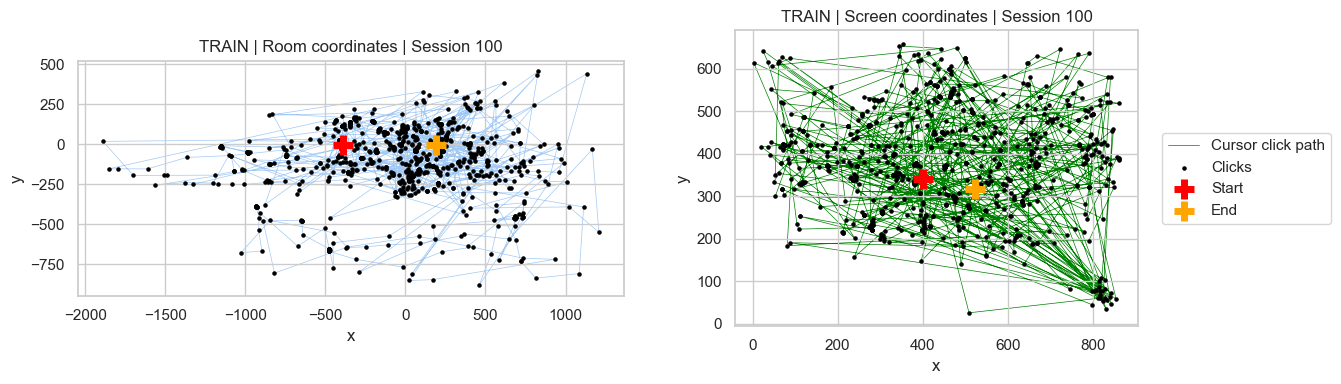

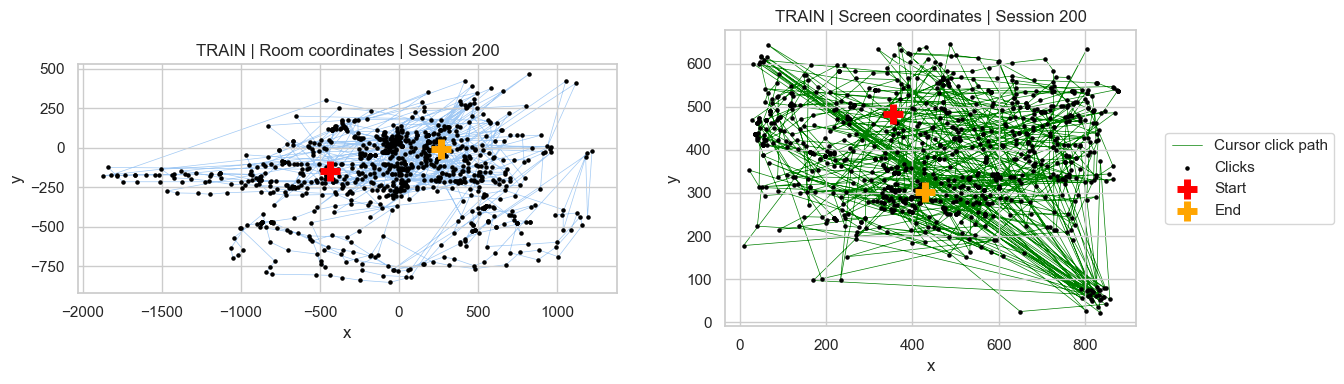

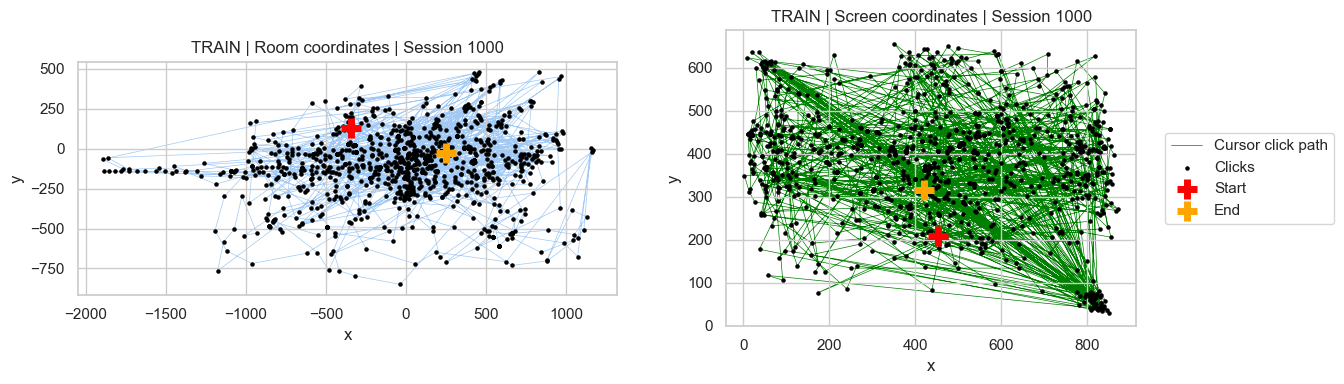

In [16]:
def plot_coordinates(i, set_name):
    df = df_train if set_name == 'TRAIN' else df_test
    session_ids = np.array(df['session_id'].unique())
    one_session = df[df['session_id'] == session_ids[i]]
    plt.figure(figsize=(14, 4))
    
    # Room coordinates
    coords = one_session[['room_coor_x', 'room_coor_y']].dropna().reset_index(drop=True)
    x = coords['room_coor_x']
    y = coords['room_coor_y']
    plt.subplot(1, 2, 1)
    plt.plot(x, y, zorder=0, lw=0.5)
    plt.scatter(x, y, s=5, color='black')
    plt.scatter(x[0], y[0], s=200, lw=5, color='red', marker='+')
    plt.scatter(x[-1:], y[-1:], s=200, lw=5, color='orange', marker='+')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"{set_name} | Room coordinates | Session {i}")
    
    # Screen coordinates
    coords = one_session[['screen_coor_x', 'screen_coor_y']]\
        .dropna().reset_index(drop=True)
    x = coords['screen_coor_x']
    y = coords['screen_coor_y']
    plt.subplot(1, 2, 2)
    plt.plot(x, y, zorder=0, lw=0.5, color='green')
    plt.scatter(x, y, s=5, color='black')
    plt.scatter(x[0], y[0], s=200, lw=5, color='red', marker='+')
    plt.scatter(x[-1:], y[-1:], s=200, lw=5, color='orange', marker='+')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"{set_name} | Screen coordinates | Session {i}")
    
    # plt.legend(['Cursor click path', 'Clicks', 'Start', 'End'])
    plt.legend(
        bbox_to_anchor = (1.5, 0.5),
        labels=['Cursor click path', 'Clicks', 'Start', 'End'],
        loc = "center right"
    )
    
    plt.tight_layout()
    plt.savefig(f"EDA_plot/corrdinates_{i}.pdf", format = "pdf", bbox_inches = "tight")
    plt.show()

# Plot 3 session examples from the train set
for i in [100, 200, 1000]:
    plot_coordinates(i, 'TRAIN')

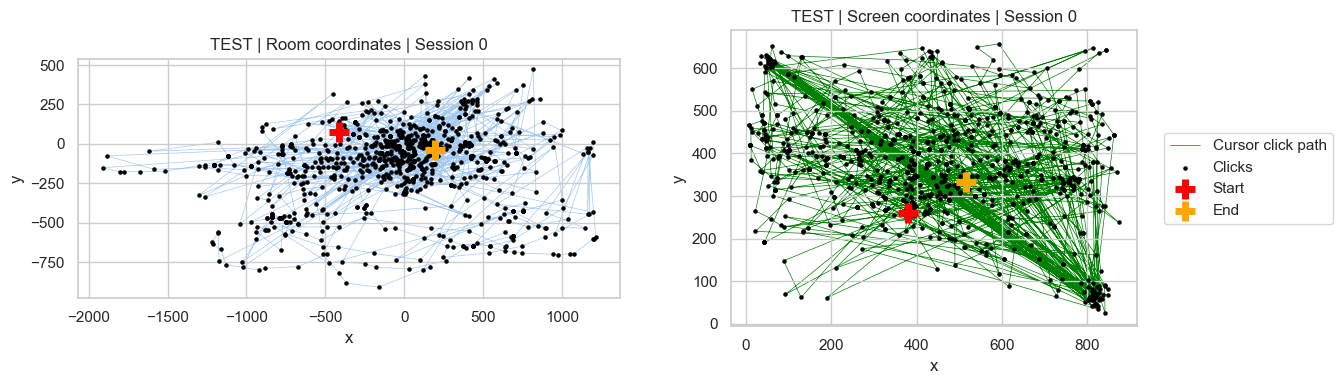

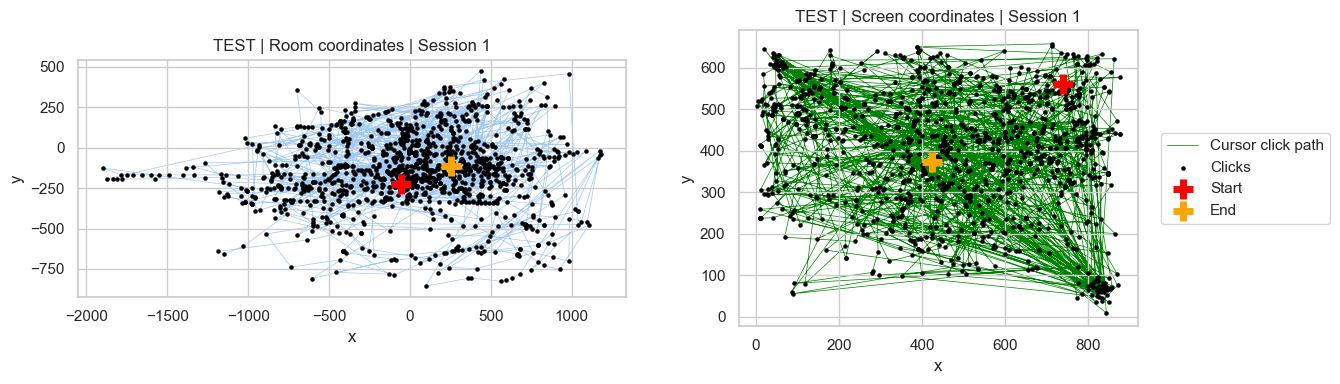

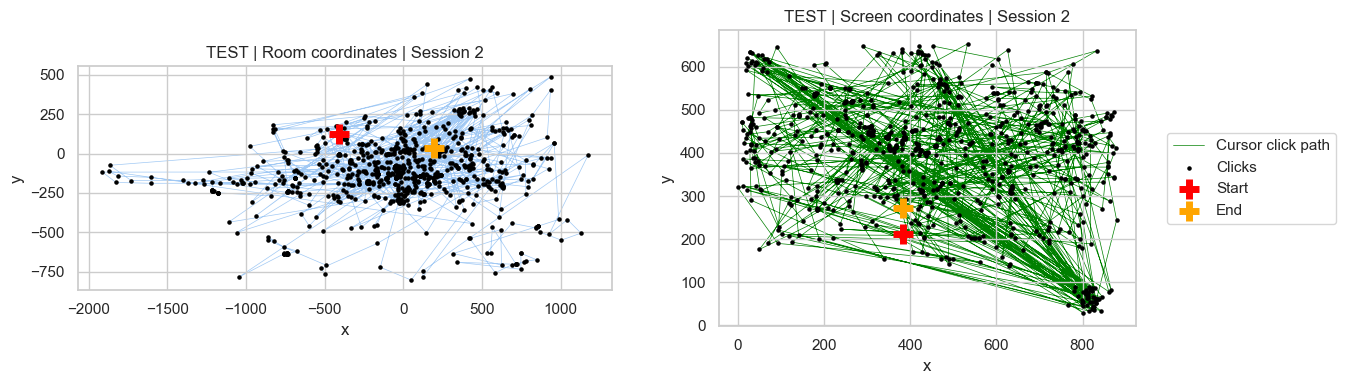

In [17]:
# Plot coordinates of all the sessions of the test set (only 3 sessions)
for i in range(3):
    plot_coordinates(i, 'TEST')

#### Findings
- The patterns across different sessions are alike. There are some noticeable clusters of clicks in certain regions.
- There are at least two potential button clusters, namely top left and bottom right. Players repeatedly navigated between these two clusters, resulting concentration of lines in the diagonal direction.
- These coordinates are probably a wealth of information, however in order to utilize it, that requires higher machine learning techniques. For example, treat it as image and use computer vision to analysis.

### `hover_duration`
>`hover_duration` - how long (in milliseconds) the hover happened for (only for hover events)

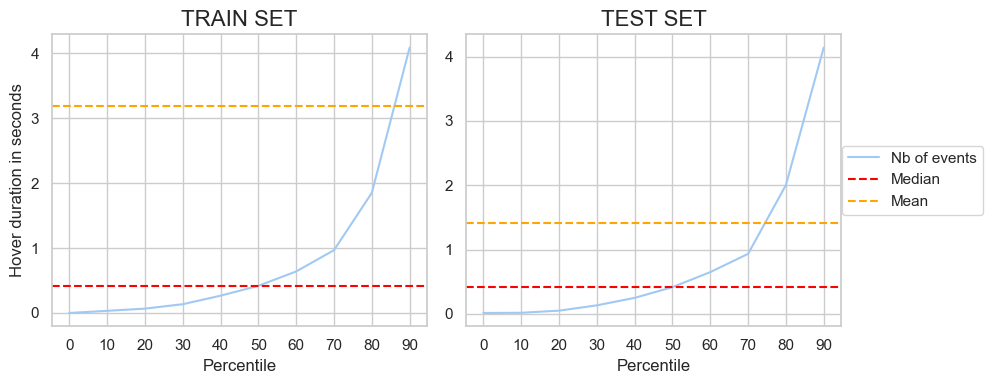

In [18]:
train_hover_durations = df_train['hover_duration'].dropna() / 1000
test_hover_durations = df_test['hover_duration'].dropna() / 1000

qrange = range(0, 100, 10)
train_percentiles = [np.percentile(train_hover_durations, q) for q in qrange]
test_percentiles = [np.percentile(test_hover_durations, q) for q in qrange]
    
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(qrange, train_percentiles)
plt.axhline(train_hover_durations.median(), color='red', ls='--')
plt.axhline(train_hover_durations.mean(), color='orange', ls='--')
plt.xticks(qrange)
plt.yticks(range(0, 5))
plt.xlabel("Percentile", fontsize=12)
plt.ylabel("Hover duration in seconds", fontsize=12)
plt.title("TRAIN SET", fontsize=16)

plt.subplot(1, 2, 2)
plt.plot(qrange, test_percentiles)
plt.axhline(test_hover_durations.median(), color='red', ls='--')
plt.axhline(test_hover_durations.mean(), color='orange', ls='--')
plt.xticks(qrange)
plt.xlabel("Percentile", fontsize=12)
plt.title("TEST SET", fontsize=16)
plt.legend(
    ['Nb of events', 'Median', 'Mean'],
    bbox_to_anchor = (1.4, 0.5),
    loc = "center right"
)

plt.tight_layout()
plt.savefig("EDA_plot/hover_durations.pdf", format = "pdf", bbox_inches = "tight")
plt.show()

#### Findings
- Similar to `page`, `hover_duration` has high ratio of missing values, because it only applies to hover events.
- The hover duration typically last within few seconds

### `text`
> `text` - the text the player sees during this event

In [19]:
train_texts = df_train['text'].dropna().value_counts()
test_texts = df_test['text'].dropna().value_counts()

print("Number of unique text in train dataset:", len(train_texts))
print('-' * 60)
print(train_texts, '\n')
print("Number of unique text in test dataset:", len(test_texts))
print('-' * 60)
print(test_texts, '\n')

Number of unique text in train dataset: 594
------------------------------------------------------------
text
undefined                                           178294
\u00f0\u0178\u02dc\u0090                             24383
Hey!                                                 23724
I should go to the Capitol and tell Mrs. M!          20074
This is perfect for the exhibit.                     19987
                                                     ...  
Sorry for the delay, Boss.                               1
And where's your grampa?                                 1
Who is Teddy?                                            1
AND I know who took Teddy!                               1
Meet me back in my office and we'll get started!         1
Name: count, Length: 594, dtype: int64 

Number of unique text in test dataset: 495
------------------------------------------------------------
text
undefined                                     27
You can talk to a textile expert there.   

#### Findings
- There are few hundred of phrases in this game and some are comonly used.
- We may use the text to generate additional features.
- NLP methods could be applied for analysis.

### `fqid`, `room_fqid` and `text_fqid`
> `fqid` - the fully qualified ID of the event

> `room_fqid` - the fully qualified ID of the room the event took place in

> `text_fqid` - the fully qualified ID of the

In [20]:
# Count values
train_fqids = df_train['fqid'].value_counts()
train_room_fqids = df_train['room_fqid'].value_counts()
train_text_fqids = df_train['text_fqid'].value_counts()
test_fqids = df_test['fqid'].value_counts()
test_room_fqids = df_test['room_fqid'].value_counts()
test_text_fqids = df_test['text_fqid'].value_counts()
train_fqid_bundle = [train_fqids, train_room_fqids, train_text_fqids]
test_fqid_bundle = [test_fqids, test_room_fqids, test_text_fqids]
fqid_labels = ["fqid", "room_fqid", "text_fqid"]

# Display the unique values
def print_fqids(set_name, bundle):
    for label, value in zip(fqid_labels, bundle):
        print('-' * 60)
        print(set_name, label)
        print('-' * 60)
        print(value)  
print_fqids('TRAIN', train_fqid_bundle)
print_fqids('TEST', test_fqid_bundle)

# Number of unique values recap table
data = {"Number of unique values": fqid_labels,
        "TRAIN": [len(x) for x in train_fqid_bundle],
        "TEST": [len(x) for x in test_fqid_bundle]}
df = pd.DataFrame(data).set_index('Number of unique values')
df

------------------------------------------------------------
TRAIN fqid
------------------------------------------------------------
fqid
worker           939555
archivist        563259
gramps           561000
wells            394234
toentry          392221
                  ...  
block_badge         854
need_glasses        675
block_badge_2       508
fox                 166
block_1              25
Name: count, Length: 127, dtype: int64
------------------------------------------------------------
TRAIN room_fqid
------------------------------------------------------------
room_fqid
tunic.historicalsociety.entry              1816202
tunic.wildlife.center                      1510888
tunic.historicalsociety.cage               1178391
tunic.library.frontdesk                    1075322
tunic.historicalsociety.frontdesk           972235
tunic.historicalsociety.stacks              900673
tunic.historicalsociety.closet_dirty        788096
tunic.humanecology.frontdesk                662645
tun

,TRAIN,TEST
Number of unique values,,
fqid,127,112
room_fqid,19,19
text_fqid,126,91


#### Findings
- These three features provide information about the **player's conversation partner**, the **player's location** in the game during the action, and the **text identifier**.
- `fqid` appears to be the identifier of the person or object the player is interacting with, or something more abstract.
- `room_fqid` is composed of three words separated by period. There are no missing values in this column, and there are 19 rooms in the game. Both the training and test sets include all of the rooms. This feature could be very useful for the model once it has been one-hot encoded. It is also possible to create new features from it by decomposing the string.
- `text_fqid` seems to be combined `room_fqid` and `fqid` and add additional information about the text itself. It may be possible to extract the last part of this text to create a new feature.

### Labels
The distribution of the labels
- 0: incorrect
- 1: correct

Classes count:
 correct
1    149252
0     62770
Name: count, dtype: int64 

Ratio:
 correct
1    0.703946
0    0.296054
Name: count, dtype: float64


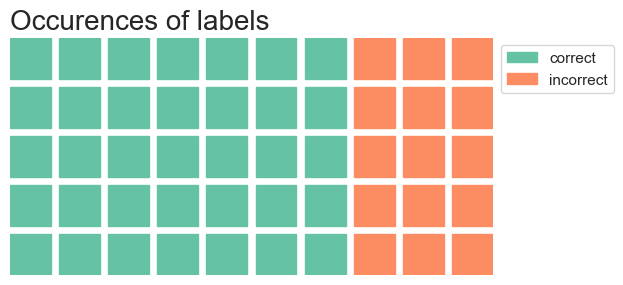

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090314121766812_q1,1
3,20090314363702160_q1,1
4,20090314441803444_q1,1


In [21]:
classes_count = df_train_labels["correct"].value_counts()
print("Classes count:\n", classes_count, "\n")
print("Ratio:\n", classes_count / len(df_train_labels))

classes_count.index = ["correct", "incorrect"]
plt.figure(
    FigureClass = Waffle,
    rows = 5,
    columns = 10,
    values = classes_count.to_dict(),
    legend = {'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    title = {"label": "Occurences of labels", "loc": "left", "size": 20}
)
plt.savefig("EDA_plot/labels.pdf", format = "pdf", bbox_inches = "tight")
plt.show()

df_train_labels.head(5)

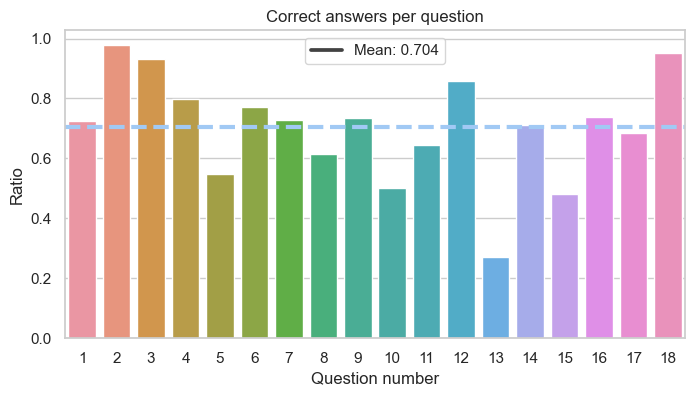

In [22]:
df_train_labels['question'] = df_train_labels['session_id'].apply(lambda x: int(x.split('_')[1][1:]))

# Calculate correct ratios
correct_ratios = []
for q in range(1, 19):
    tmp = df_train_labels[df_train_labels['question'] == q]['correct']
    ratio = tmp.sum() / len(tmp) 
    correct_ratios.append(ratio)

mean = np.mean(correct_ratios)
plt.figure(figsize=(8, 4))
sns.barplot(x = list(range(1, 19)), y = correct_ratios)
plt.axhline(mean, ls='--', lw=3)
plt.legend([f'Mean: {mean:.3f}'])
plt.title("Correct answers per question")
plt.xlabel("Question number")
plt.ylabel("Ratio")
plt.savefig("EDA_plot/correct_ratios.pdf", format = "pdf", bbox_inches = "tight")
plt.show()

#### Findings
- In total, about 70% correct and 30% incorrect.
- The dataset is slightly imbalanced.
- There are only 18 questions while there are 22 levels